# Loss function relative amplitudes under different forms of the Hebbian objective
This notebook visualizes how different forms of the variance-maximising objective interact with the predictive objective, and how the total objective scales with average output activity levels showing why it's important to suppress Hebbian learning at high variance levels. The full figure can be found in the paper as Figure S1 in the Supplementary Material.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

import seaborn as sns

In [5]:
outputdir = os.path.expanduser("~/data/lpl/plots/suppl_fig_losses")
os.makedirs(outputdir, exist_ok=True)

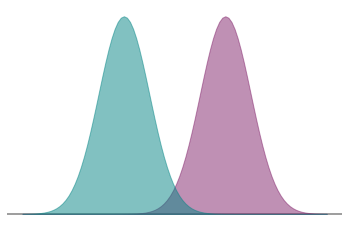

In [6]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x = np.linspace(-6, 6, 100)
dist1 = gaussian(x, 2, 1)
dist2 = gaussian(x, -2, 1)

plt.fill_between(x, dist1, alpha=0.5, color='#81226A')
plt.fill_between(x, dist2, alpha=0.5, color='#058585')
plt.axis('off')
plt.axhline(0, color='gray', zorder=0)
plt.savefig(os.path.join(outputdir,'losses_distribution.pdf'), bbox_inches='tight', backend='pgf')

In [7]:
d = np.linspace(1e-3,10)

Lpred = d**2/8
variance = d**2*(1.0/4 + 1.0/16)
Lvar = -variance
Llogvar = -np.log(variance)
Lbardes = 1-np.sqrt(variance)
Lbardes[Lbardes<0] = 0
Lsfa = 1-variance

In [8]:
colors = ['#8da0cb', '#fc8d62', '#66c2a5']

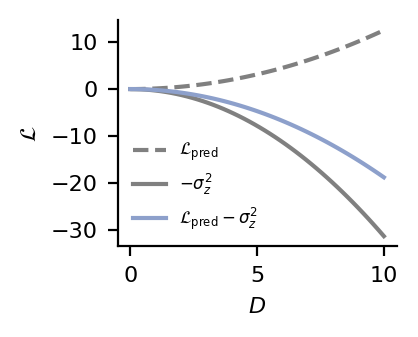

In [15]:
plt.figure(figsize=(1.8,1.5), dpi=200)
plt.plot(d, Lpred, label=r'$\mathcal{L}_\mathrm{pred}$', color='gray', linestyle='--')
plt.plot(d, Lvar, label=r'$-\sigma_z^2$', color='gray')
plt.plot(d, Lpred+Lvar, label=r'$\mathcal{L}_\mathrm{pred} - \sigma_z^2$', color=colors[0])

plt.xlabel(r'$D$', fontsize=8)
plt.ylabel(r'$\mathcal{L}$', fontsize=8)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize=8)
plt.legend(fontsize=6,frameon=False)
sns.despine()

plt.savefig(os.path.join(outputdir,'losses_variance.pdf'), bbox_inches='tight')

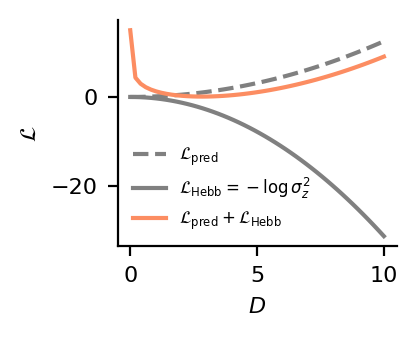

In [17]:
plt.figure(figsize=(1.8,1.5), dpi=200)
plt.plot(d, Lpred, label=r'$\mathcal{L}_\mathrm{pred}$', color='gray', linestyle='--')
plt.plot(d, Lvar, label=r'$\mathcal{L}_\mathrm{Hebb}=-\log\sigma_z^2$', color='gray')
plt.plot(d, Lpred+Llogvar, label=r'$\mathcal{L}_\mathrm{pred} + \mathcal{L}_\mathrm{Hebb}$', color=colors[1])

plt.xlabel(r'$D$', fontsize=8)
plt.ylabel(r'$\mathcal{L}$', fontsize=8)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize=8)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%5d'))
plt.legend(fontsize=6,frameon=False)
sns.despine()

plt.savefig(os.path.join(outputdir,'losses_logvariance.pdf'), bbox_inches='tight')

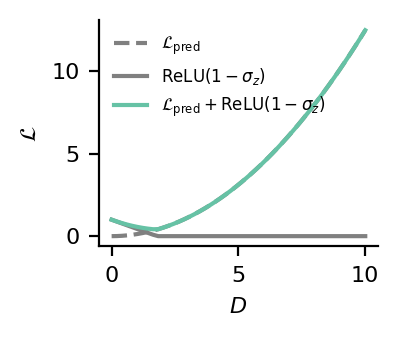

In [18]:
plt.figure(figsize=(1.8,1.5), dpi=200)
plt.plot(d, Lpred, label=r'$\mathcal{L}_\mathrm{pred}$', color='gray', linestyle='--')
plt.plot(d, Lbardes, label=r'$\mathrm{ReLU}(1-\sigma_z)$', color='gray')
plt.plot(d, Lpred+Lbardes, label=r'$\mathcal{L}_\mathrm{pred} + \mathrm{ReLU}(1-\sigma_z)$', color=colors[2])

plt.xlabel(r'$D$', fontsize=8)
plt.ylabel(r'$\mathcal{L}$', fontsize=8)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize=8)
plt.legend(fontsize=6,frameon=False)
sns.despine()

plt.savefig(os.path.join(outputdir,'losses_vic.pdf'), bbox_inches='tight')